# 实现《合成孔径雷达成像——算法与实现》中2.3.4 矩形函数sinc函数的傅里叶变换(图2.3的实现）

## 矩形函数和sinc函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 函数图形

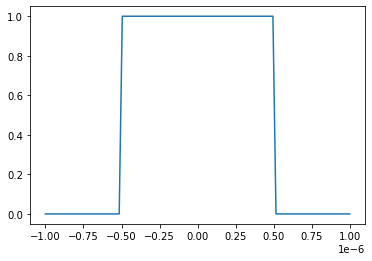

In [2]:
#rect

Tp = 1e-6
def rect(x):
    return  np.where(np.abs(x)<=0.5,1,0)
    
x = np.linspace(-Tp,Tp,100);
y = rect(x/Tp);
plt.plot(x,y)
plt.show()

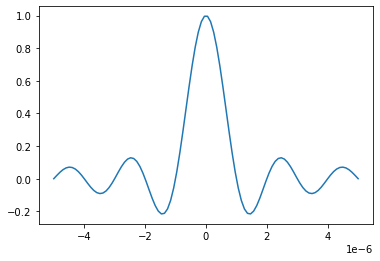

In [3]:
x = np.linspace(-5*Tp,5*Tp,100);
y = np.sinc(x/Tp);
plt.plot(x,y)
plt.show()

#### 用符号计算包画图

In [4]:
#用符号计算包画图
from sympy import symbols,Ne,Rational,Piecewise,pi,sin,fourier_transform

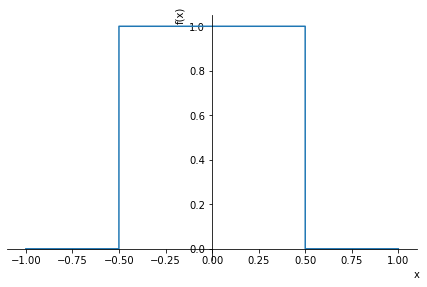

Piecewise((0, (x > 1/2) | (x < -1/2)), (1, True))


In [5]:
from sympy.plotting import plot
x = symbols('x')
rect = Piecewise((0, x < -Rational(1,2)), (0, x>Rational(1,2)), (1, True))  #分段函数代表|x|大于 1/2时为0，其余为1
plot( rect,(x,-1,1),show=True)
print( rect )

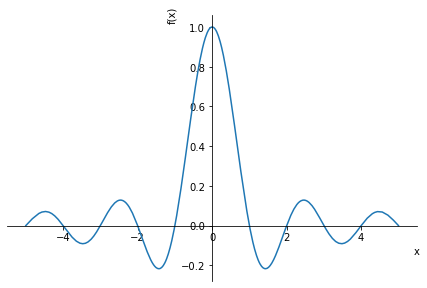

sin(pi*x)/(pi*x)


In [6]:
sinc = sin( pi * x) /(pi * x)
plot( sinc,(x,-5,5),show=True)
print( sinc )

### 傅里叶变换

#### sinc函数通过傅里叶变换为rect函数

(-2.0, 2.0)

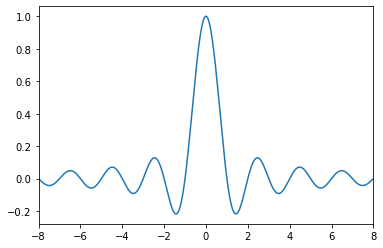

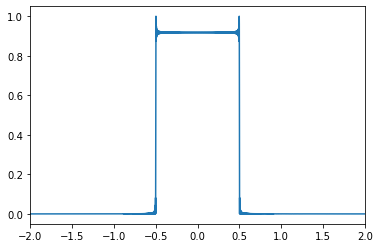

In [3]:
from numpy.fft import fft,fftshift
dt = 0.01
t = np.arange(-200,200,dt)
fs = 1/dt;
x = np.sinc(t);
plt.figure()
plt.plot(t,x);
plt.xlim(-8,8)
N=2**20;
df=np.arange(-fs/2,fs/2,fs/N)

sincf = fft(x,N);
plt.figure()
plt.plot(df,fftshift(np.abs(sincf))/np.max(np.max(np.abs(sincf))))
plt.xlim(-2,2)

#### 矩形函数变换为sinc函数

(-4.0, 4.0)

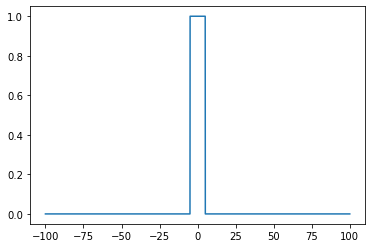

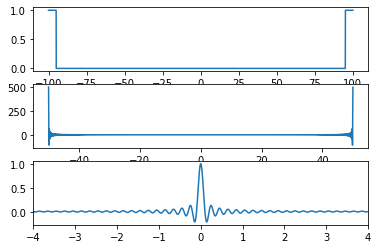

In [8]:
t = np.arange(-100,100,0.01)
fs = 100;
A = np.zeros(20000);
A[9500:10500] = 1
plt.figure()
plt.plot(t,A)
N = 2**14;

Af = fft(fftshift(A),N);
f=np.arange(-fs/2,fs/2,fs/N)
plt.figure()
plt.subplot(311)
plt.plot(t,fftshift(A))
plt.subplot(312)
plt.plot(f,np.real(Af))
plt.subplot(313)
plt.plot(f,fftshift(np.real(Af))/np.max(np.real(Af)))
plt.xlim(-4,4)

#### 符号运算计算傅里叶变换

In [14]:
x,k = symbols('x k')

In [15]:
##以下是用符号运算计算傅里叶变换
rect = Piecewise((0, x < -Rational(1,2)), (0, x>Rational(1,2)), (1, True))
f = fourier_transform(rect,x,k)
print(f)

Piecewise((sin(pi*k)/(pi*k), (k > -oo) & (k < oo) & Ne(k, 0)), (1, True))


In [17]:
f = fourier_transform(sinc,x,k)
print(f)

Piecewise((0, 4*Abs(k**2) > 1), (1, True))


## 单频信号

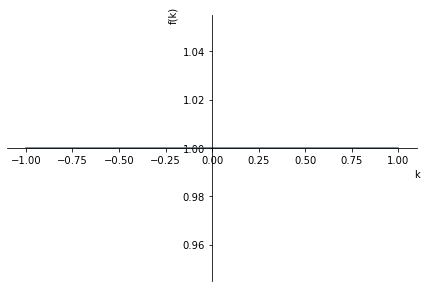

Piecewise((1, Ne(k, 0)), (0, True))


In [43]:


delt = Piecewise((1, Ne(k, 0)), (0, True))
plot( delt,(x,-1,1),show=True)
print( delt )

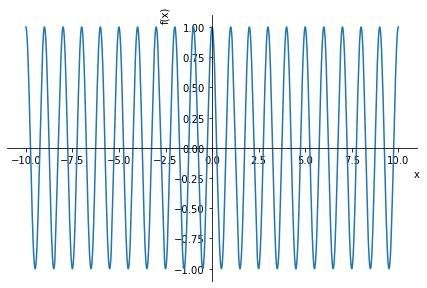

exp(-2.0*pi*im(x))*cos(2*pi*re(x))


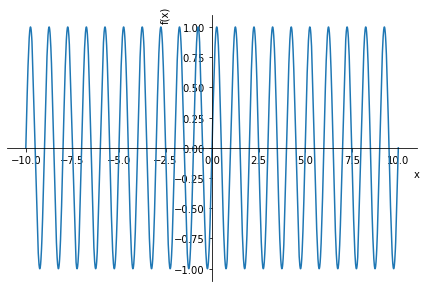

exp(-2.0*pi*im(x))*sin(2*pi*re(x))


In [47]:
fr = re(exp(1j*2*pi*x))

plot( fr,(x,-10,10),show=True)
print( fr )
fi = im(exp(1j*2*pi*x))
plot( fi,(x,-10,10),show=True)
print( fi )

In [48]:
fn = exp(1j*2*pi*x)
f = fourier_transform(fn,x,k)
print(f)

FourierTransform(exp(2.0*I*pi*x), x, k)


In [42]:
f = Piecewise((1, Ne(k, 0)), (0, True))
fn = fourier_transform(f,x,k)
print(fn)

FourierTransform(1, x, k)*Piecewise((1, Ne(k, 0)), (0, True))


d:\anaconda3\envs\stock\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
d:\anaconda3\envs\stock\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'fftshift line')

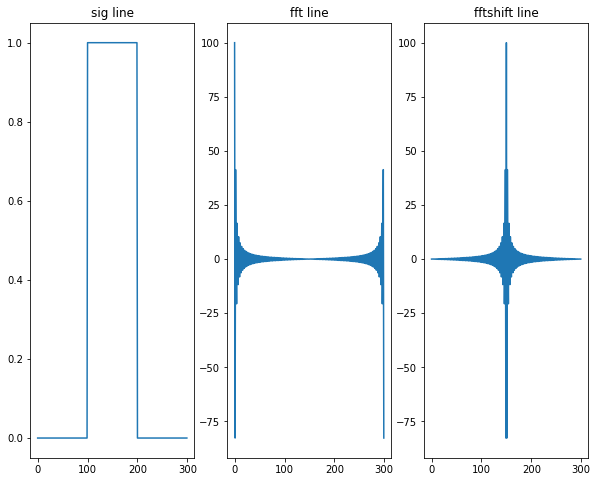

In [10]:
import scipy.signal as sgn
import scipy.fftpack as fpk
sig = np.repeat([0.0, 1.0, 0.0], 100)
A = fpk.fft(x=sig)

plt.figure(num=2, figsize=(10, 8))
plt.subplot(131)
plt.plot(sig)  # 绘制原始信号
plt.title('sig line')

plt.subplot(132)
plt.plot(A)  # 绘制傅里叶变换后的信号图像
plt.title('fft line')

B = fpk.fftshift(A)
plt.subplot(133)
plt.plot(B)  # 范围调整后的傅里叶变换信号图像
plt.title('fftshift line')
